In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [43]:
pd.options.display.max_rows = 6000
pd.options.display.max_columns = 80

data = pd.read_csv('./brazilian-cities/BRAZIL_CITIES.csv', sep=";", decimal=",")

##note que a df está sem a feature AREA e RURAL_URBAN

ft1 = ["IBGE_RES_POP", "IBGE_RES_POP_BRAS", "IBGE_RES_POP_ESTR", "IBGE_DU", "IBGE_DU_URBAN", "IBGE_DU_RURAL", "IBGE_POP", "IBGE_1", "IBGE_1-4", "IBGE_5-9", "IBGE_10-14", "IBGE_15-59", "IBGE_60+", "IBGE_PLANTED_AREA", "IBGE_CROP_PRODUCTION_$", "IDHM Ranking 2010", "IDHM", "IDHM_Renda", "IDHM_Longevidade", "IDHM_Educacao", "LONG", "LAT", "ALT", "PAY_TV", "FIXED_PHONES", "ESTIMATED_POP", "GVA_AGROPEC", "GVA_INDUSTRY", "GVA_SERVICES", "GVA_PUBLIC", "TAXES", "GDP", "POP_GDP", "GDP_CAPITA", "MUN_EXPENDIT", "COMP_TOT", "COMP_A", "COMP_B", "COMP_C", "COMP_D", "COMP_E", "COMP_F", "COMP_G", "COMP_H", "COMP_I", "COMP_J", "COMP_K", "COMP_L", "COMP_M", "COMP_N", "COMP_O", "COMP_P", "COMP_Q", "COMP_R", "COMP_S", "COMP_T", "COMP_U", "HOTELS", "BEDS", "Pr_Agencies", "Pu_Agencies", "Pr_Bank", "Pu_Bank", "Pr_Assets", "Pu_Assets", "Cars", "Motorcycles", "Wheeled_tractor", "UBER", "MAC", "WAL-MART", "POST_OFFICES"]
df1 = data[ft1]

ft = ["IBGE_RES_POP", "IBGE_RES_POP_BRAS", "IBGE_RES_POP_ESTR", "IBGE_DU", "IBGE_DU_URBAN", "IBGE_DU_RURAL", "IBGE_POP", "IBGE_1", "IBGE_1-4", "IBGE_5-9", "IBGE_10-14", "IBGE_15-59", "IBGE_60+", "IBGE_PLANTED_AREA", "IBGE_CROP_PRODUCTION_$", "ALT", "PAY_TV", "FIXED_PHONES", "ESTIMATED_POP", "GVA_AGROPEC", "GVA_INDUSTRY", "GVA_SERVICES", "GVA_PUBLIC", "TAXES", "GDP", "POP_GDP", "MUN_EXPENDIT", "COMP_TOT", "COMP_A", "COMP_B", "COMP_C", "COMP_D", "COMP_E", "COMP_F", "COMP_G", "COMP_H", "COMP_I", "COMP_J", "COMP_K", "COMP_L", "COMP_M", "COMP_N", "COMP_O", "COMP_P", "COMP_Q", "COMP_R", "COMP_S", "COMP_T", "COMP_U", "HOTELS", "BEDS", "Pr_Agencies", "Pu_Agencies", "Pr_Bank", "Pu_Bank", "Pr_Assets", "Pu_Assets", "Cars", "Motorcycles", "Wheeled_tractor", "UBER", "MAC", "WAL-MART", "POST_OFFICES"]
df = data[ft]

In [46]:
#df['LONG'] = df['LONG'].astype(float)
#df['LAT'] = df['LAT'].astype(float)
df['ALT'] = df['ALT'].astype(float)
#df['AREA'] = df['AREA'].astype(float)#
#df['RURAL_URBAN'] = df['RURAL_URBAN'].astype(float)
df['GVA_AGROPEC'] = df['GVA_AGROPEC'].astype(float)
df['GVA_INDUSTRY'] = df['GVA_INDUSTRY'].astype(float)
df['GVA_SERVICES'] = df['GVA_SERVICES'].astype(float)
df['GVA_PUBLIC'] = df['GVA_PUBLIC'].astype(float)
df['TAXES'] = df['TAXES'].astype(float)
df['GDP'] = df['GDP'].astype(float)
#df['GDP_CAPITA'] = df['GDP_CAPITA'].astype(float)


/home/giovanna/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/giovanna/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/giovanna/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[

In [47]:
df1['IDHM'] = df1['IDHM'].astype(float)

def get_rotulo(value):
    if value >= 0.8:
        return "muito_alto"
    elif 0.69 < value <= 0.79:
        return "alto"
    elif 0.59 < value <= 0.69:
        return "médio"
    elif 0.49 < value <= 0.59:
        return "baixo"
    else:
        return "muito_baixo"

df["rótulo"] = df1['IDHM'].apply(get_rotulo)

/home/giovanna/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/giovanna/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


In [48]:
print(len(df.columns))

65


In [49]:
print(df.dtypes)

IBGE_RES_POP              float64
IBGE_RES_POP_BRAS         float64
IBGE_RES_POP_ESTR         float64
IBGE_DU                   float64
IBGE_DU_URBAN             float64
IBGE_DU_RURAL             float64
IBGE_POP                  float64
IBGE_1                    float64
IBGE_1-4                  float64
IBGE_5-9                  float64
IBGE_10-14                float64
IBGE_15-59                float64
IBGE_60+                  float64
IBGE_PLANTED_AREA         float64
IBGE_CROP_PRODUCTION_$    float64
ALT                       float64
PAY_TV                    float64
FIXED_PHONES              float64
ESTIMATED_POP             float64
GVA_AGROPEC               float64
GVA_INDUSTRY              float64
GVA_SERVICES              float64
GVA_PUBLIC                float64
TAXES                     float64
GDP                       float64
POP_GDP                   float64
MUN_EXPENDIT              float64
COMP_TOT                  float64
COMP_A                    float64
COMP_B        

In [50]:
df=  df.fillna(0)

In [51]:
#separação da classe em y
X = df.iloc[:, 0:62].values
y = df.iloc[:, 64].values

In [52]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [53]:
from sklearn.ensemble import RandomForestClassifier

#100 árvores
model = RandomForestClassifier(n_estimators=100, 
                               bootstrap = True,
                               max_features = 'sqrt')

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
model.score(X_test, y_test)

0.7811004784688995

Feature ranking:
1. feature 57 (0.059785)
2. feature 35 (0.057097)
3. feature 5 (0.055111)
4. feature 17 (0.051190)
5. feature 30 (0.033322)
6. feature 18 (0.030295)
7. feature 0 (0.030039)
8. feature 1 (0.028338)
9. feature 25 (0.027485)
10. feature 36 (0.026841)
11. feature 27 (0.026347)
12. feature 40 (0.024337)
13. feature 15 (0.022706)
14. feature 3 (0.021502)
15. feature 14 (0.021320)
16. feature 13 (0.020289)
17. feature 58 (0.019632)
18. feature 21 (0.017305)
19. feature 22 (0.016774)
20. feature 20 (0.016681)
21. feature 38 (0.016534)
22. feature 9 (0.016350)
23. feature 8 (0.016145)
24. feature 23 (0.015981)
25. feature 28 (0.014830)
26. feature 19 (0.014596)
27. feature 16 (0.014485)
28. feature 10 (0.014462)
29. feature 34 (0.014245)
30. feature 7 (0.013960)
31. feature 24 (0.013945)
32. feature 37 (0.013766)
33. feature 4 (0.013353)
34. feature 33 (0.013288)
35. feature 41 (0.013136)
36. feature 11 (0.012945)
37. feature 45 (0.012853)
38. feature 12 (0.012388)
39. feature 

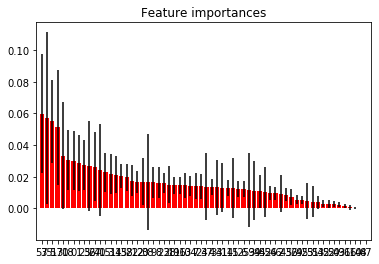

In [54]:
importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])
plt.show()

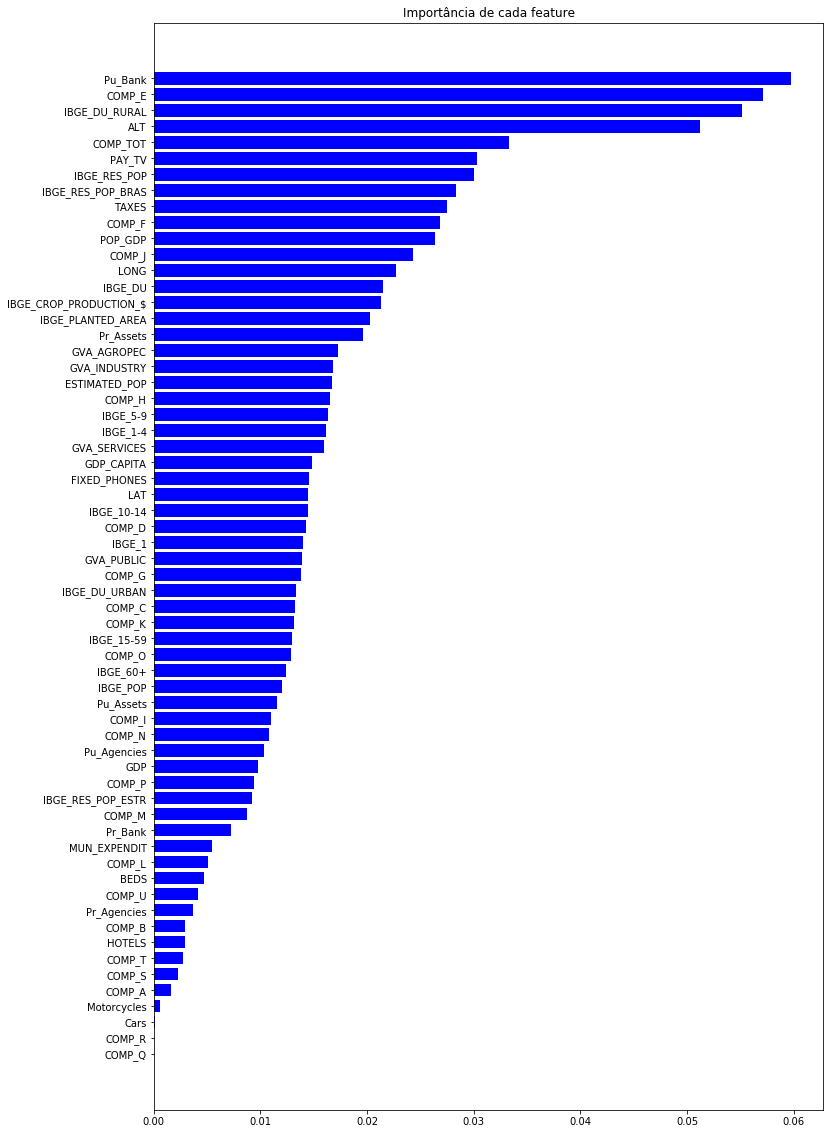

In [55]:
features = ["IBGE_RES_POP", "IBGE_RES_POP_BRAS", "IBGE_RES_POP_ESTR", "IBGE_DU", "IBGE_DU_URBAN", "IBGE_DU_RURAL", "IBGE_POP", "IBGE_1", "IBGE_1-4", "IBGE_5-9", "IBGE_10-14", "IBGE_15-59", "IBGE_60+", "IBGE_PLANTED_AREA", "IBGE_CROP_PRODUCTION_$","LONG", "LAT", "ALT", "PAY_TV", "FIXED_PHONES", "ESTIMATED_POP", "GVA_AGROPEC", "GVA_INDUSTRY", "GVA_SERVICES", "GVA_PUBLIC", "TAXES", "GDP", "POP_GDP", "GDP_CAPITA", "MUN_EXPENDIT", "COMP_TOT", "COMP_A", "COMP_B", "COMP_C", "COMP_D", "COMP_E", "COMP_F", "COMP_G", "COMP_H", "COMP_I", "COMP_J", "COMP_K", "COMP_L", "COMP_M", "COMP_N", "COMP_O", "COMP_P", "COMP_Q", "COMP_R", "COMP_S", "COMP_T", "COMP_U", "HOTELS", "BEDS", "Pr_Agencies", "Pu_Agencies", "Pr_Bank", "Pu_Bank", "Pr_Assets", "Pu_Assets", "Cars", "Motorcycles", "Wheeled_tractor", "UBER", "MAC", "WAL-MART", "POST_OFFICES"]
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 20))
plt.title('Importância de cada feature')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.show()


In [56]:
def metrics (y_test, y_pred):
  ac = accuracy_score(y_test, y_pred)
  rec = recall_score(y_test,y_pred, average= 'weighted')
  prec = precision_score(y_test,y_pred, average='weighted')
  return (ac, rec, prec)

In [57]:
acuracia, recall, precisao= metrics(y_test,y_pred)
stringSaida= "acuracia = {ac} , recall = {rec} , precisao = {prec} ".format (ac = acuracia, rec = recall, prec = precisao)
print (stringSaida)

acuracia = 0.7811004784688995 , recall = 0.7811004784688995 , precisao = 0.7825065161203457 
